In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import itertools
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical, np_utils 
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
from sklearn.metrics import confusion_matrix

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train/test趨勢圖
def show_train_history(history, train, validation, modeltype, num, epochs):  
    plt.plot(history.history[train], linewidth=3)  
    plt.plot(history.history[validation], linewidth=3)  
    plt.title('Train History')
    my_x_ticks = np.arange(0,epochs,1)
    plt.xticks(my_x_ticks)
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid(True)
    if train == 'acc':
        plt.savefig("image/MNIST_acc_model_" + modeltype + str(num) + ".jpg", dpi=300)
    if train == 'loss':
        plt.savefig("image/MNIST_loss_model_" + modeltype + str(num) + ".jpg", dpi=300)
    plt.show()  

# MLP

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 將每一幅影像都轉換為一個長向量，大小為28*28=784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 將影像的畫素歸到0~1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# MLP Model 參數設定
modeltype = 'MLP'
optimizer = 'rmsprop'
batch_size = 128
num_classes = 10
epochs = 20
verbose = 1

In [5]:
# 將類別向量轉換為二進制矩陣
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
train_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 466us/step - loss: 0.2442 - acc: 0.9239 - val_loss: 0.1118 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.1041 - acc: 0.9682 - val_loss: 0.0885 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0758 - acc: 0.9769 - val_loss: 0.0791 - val_acc: 0.9766
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0610 - acc: 0.9810 - val_loss: 0.0696 - val_acc: 0.9820
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0490 - acc: 0.9853 - val_loss: 0.0796 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0839 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0383 - acc: 0.9888 - val_loss: 0.0929 - val_a

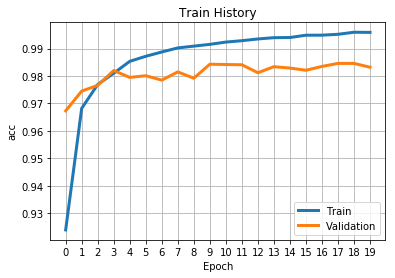

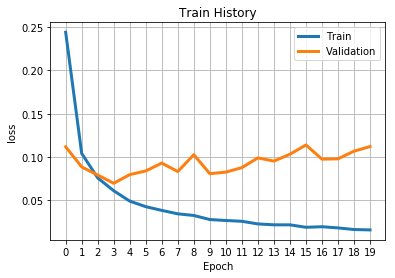

,score
metrics,
Test loss,0.112051
Test accuracy,0.983200


In [8]:
num = 1
score = model.evaluate(x_test, y_test, verbose=0)
show_train_history(train_history, 'acc', 'val_acc', modeltype, num, epochs)
show_train_history(train_history, 'loss', 'val_loss', modeltype, num, epochs)

df = pd.DataFrame()
metrics = ['Test loss','Test accuracy']
score = [score[0], score[1]]
df["metrics"] = metrics
df["score"] = score
df.set_index('metrics', inplace=True)
df

# CNN

In [9]:
np.random.seed(10)  
(x_train, y_train), (x_test, y_test) = mnist.load_data()  

x_train40 = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')  
x_test40 = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')  
print(x_train40.shape[0], 'train samples')
print(x_test40.shape[0], 'test samples')

x_train40_norm = x_train40 / 255  
x_test40_norm = x_test40 /255  
  
y_trainOneHot = np_utils.to_categorical(y_train)  
y_testOneHot = np_utils.to_categorical(y_test) 

60000 train samples
10000 test samples


# CNN Model 1

In [10]:
# CNN Model 1 參數設定
modeltype = 'CNN'
optimizer = 'sgd'
batch_size = 64
epochs = 20
verbose = 1

In [11]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Conv2D(36, (5,5), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  
train_history = model.fit(x=x_train40_norm, y=y_trainOneHot, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 24s 491us/step - loss: 0.9806 - acc: 0.6916 - val_loss: 0.2525 - val_acc: 0.9285
Epoch 2/20
48000/48000 [==============================] - 16s 326us/step - loss: 0.3250 - acc: 0.9029 - val_loss: 0.1589 - val_acc: 0.9527
Epoch 3/20
48000/48000 [==============================] - 17s 358us/step - loss: 0.2331 - acc: 0.9315 - val_loss: 0.1283 - val_acc: 0.9624
Epoch 4/20
48000/48000 [==============================] - 17s 356us/step - loss: 0.1880 - acc: 0.9448 - val_loss: 0.1046 - val_acc: 0.9680
Epoch 5/20
48000/48000 [==============================] - 18s 366us/step - loss: 0.1610 - acc: 0.9531 - val_loss: 0.0882 - val_acc: 0.9725s - loss: 0.
Epoch 6/20
48000/48000 [==============================] - 11s 227us/step - loss: 0.1436 - acc: 0.9584 - val_loss: 0.0827 - val_acc: 0.9747
Epoch 7/20
48000/48000 [==============================] - 12s 247us/step - loss: 0.1253 - acc: 0.9634 - 

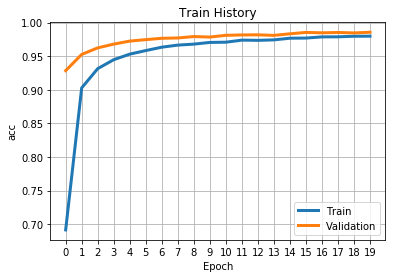

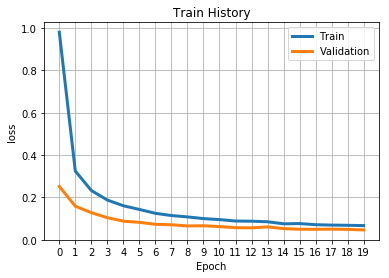

,score
metrics,
Test loss,0.035157
Test accuracy,0.988400


In [13]:
num = 1
score = model.evaluate(x_test40_norm, y_testOneHot, verbose=0)
show_train_history(train_history, 'acc', 'val_acc', modeltype, num, epochs)
show_train_history(train_history, 'loss', 'val_loss', modeltype, num, epochs)

df = pd.DataFrame()
metrics = ['Test loss','Test accuracy']
score = [score[0], score[1]]
df["metrics"] = metrics
df["score"] = score
df.set_index('metrics', inplace=True)
df

# CNN Model 2

In [14]:
# CNN Model 2 參數設定
modeltype = 'CNN'
optimizer = 'rmsprop'
batch_size = 128
epochs = 20
num_classes = 10
verbose = 1

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  
train_history = model.fit(x=x_train40_norm, y=y_trainOneHot, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(x_test40_norm, y_testOneHot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.2344 - acc: 0.9291 - val_loss: 0.0552 - val_acc: 0.9812
Epoch 2/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0850 - acc: 0.9750 - val_loss: 0.0390 - val_acc: 0.9879
Epoch 3/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0658 - acc: 0.9811 - val_loss: 0.0462 - val_acc: 0.9853
Epoch 4/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0561 - acc: 0.9836 - val_loss: 0.0348 - val_acc: 0.9890
Epoch 5/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.0504 - acc: 0.9854 - val_loss: 0.0336 - val_acc: 0.9881
Epoch 6/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.0456 - acc: 0.9870 - val_loss: 0.0324 - val_acc: 0.9894
Epoch 7/20
60000/60000 [==============================] - 20s 329us/step - loss: 0.0445 - acc: 0.9874 - val_loss: 0.

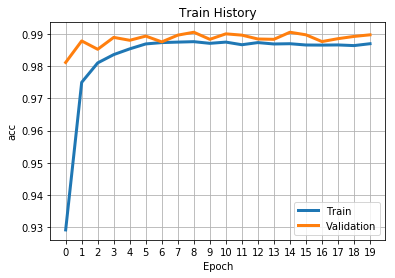

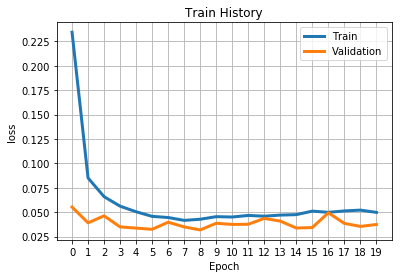

,score
metrics,
Test loss,0.037317
Test accuracy,0.989800


In [17]:
num = 2
score = model.evaluate(x_test40_norm, y_testOneHot, verbose=0)
show_train_history(train_history, 'acc', 'val_acc', modeltype, num, epochs)
show_train_history(train_history, 'loss', 'val_loss', modeltype, num, epochs)

df = pd.DataFrame()
metrics = ['Test loss','Test accuracy']
score = [score[0], score[1]]
df["metrics"] = metrics
df["score"] = score
df.set_index('metrics', inplace=True)
df

# CNN Model 3

In [18]:
# CNN Model 3 參數設定
modeltype = 'CNN'
optimizer = 'rmsprop'
batch_size = 128
epochs = 20
verbose = 1

In [19]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 加入 Covn2d 層 Conv2D(過濾器數量,過濾器長寬)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())  # 建立平坦層 
model.add(Dense(128, activation='relu'))  # 建立 Hidden layer 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 建立輸出層 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               73856     
__________

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])  
train_history = model.fit(x=x_train40_norm, y=y_trainOneHot, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.3379 - acc: 0.8951 - val_loss: 0.0717 - val_acc: 0.9784
Epoch 2/20
48000/48000 [==============================] - 8s 169us/step - loss: 0.0859 - acc: 0.9746 - val_loss: 0.0492 - val_acc: 0.9858
Epoch 3/20
48000/48000 [==============================] - 8s 161us/step - loss: 0.0583 - acc: 0.9827 - val_loss: 0.0421 - val_acc: 0.9877
Epoch 4/20
48000/48000 [==============================] - 8s 174us/step - loss: 0.0445 - acc: 0.9870 - val_loss: 0.0440 - val_acc: 0.9870
Epoch 5/20
48000/48000 [==============================] - 8s 160us/step - loss: 0.0364 - acc: 0.9893 - val_loss: 0.0380 - val_acc: 0.9905
Epoch 6/20
48000/48000 [==============================] - 8s 168us/step - loss: 0.0316 - acc: 0.9905 - val_loss: 0.0334 - val_acc: 0.9911
Epoch 7/20
48000/48000 [==============================] - 7s 156us/step - loss: 0.0258 - acc: 0.9924 - val_loss: 0.0341 -

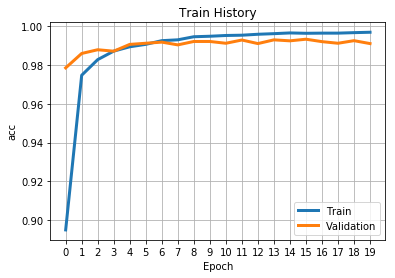

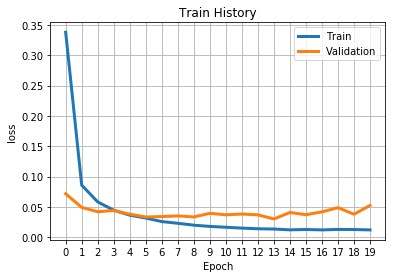

,score
metrics,
Test loss,0.012839
Test accuracy,0.997400


In [21]:
num = 3
score = model.evaluate(x_train40_norm, y_trainOneHot, verbose=0)
show_train_history(train_history, 'acc', 'val_acc', modeltype, num, epochs)
show_train_history(train_history, 'loss', 'val_loss', modeltype, num, epochs)

df = pd.DataFrame()
metrics = ['Test loss','Test accuracy']
score = [score[0], score[1]]
df["metrics"] = metrics
df["score"] = score
df.set_index('metrics', inplace=True)
df